<a href="https://colab.research.google.com/github/phoebe-yifei-wang/phoebe-yifei-wang.github.io/blob/main/UCLA_SICSS_2025_Heterogeneous_Effects_Workshop_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=========================================

UCLA SICSS 2025

Heterogenous Effects Workshop

Mini-Lab Session

Date: 08-21-2025

=========================================



## Set up

In [ ]:
# 14 minutes
install.packages("randomForest")
install.packages("grf")
install.packages("glmnet")
install.packages("SuperLearner")
install.packages("caret")

# visualization (optional)
install.packages("rpart.plot")
install.packages("dichromat")
install.packages("partykit")
install.packages("data.tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘DiceKriging’, ‘lmtest’, ‘sandwich’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’, ‘nnls’, ‘gam’, ‘cvAUC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package i

In [ ]:
# =====================================================
# Load packages
# =====================================================
library(tidyverse)
library(randomForest)
library(grf)
library(glmnet)
library(SuperLearner)
library(caret)

# visualization (optional)
library(rpart)
library(rpart.plot)
library(dichromat)
library(partykit)
library(data.tree)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10

Loading required package: nnls

Loading required package

In [ ]:
# 10 minutes
# Load data from existing packages for LaLonde-Dehejia-Wahba (LDW) (male only).
# source the functions provided in part 1
source("https://github.com/xuyiqing/lalonde/blob/main/tutorial/functions.R?raw=TRUE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘SparseM’, ‘MatrixModels’, ‘RcppArmadillo’, ‘operator.tools’, ‘Hmisc’, ‘quantreg’, ‘BMisc’, ‘formula.tools’, ‘texreg’, ‘pbapply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘chk’, ‘RcppProgress’, ‘MatchIt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nloptr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

In [ ]:
# load("/content/lalonde.RData")
lalonde = read_csv("/content/ldw.csv")
lalonde

Rows: 445 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): data_id
dbl (13): treat, age, education, black, hispanic, married, nodegree, re74, r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75,sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dehejia-Wahba Sample,1,37,11,1,0,1,1,0,0,9930.0459,1,1,1
Dehejia-Wahba Sample,1,22,9,0,1,0,1,0,0,3595.8940,1,1,1
Dehejia-Wahba Sample,1,30,12,1,0,0,0,0,0,24909.4492,1,1,1
Dehejia-Wahba Sample,1,27,11,1,0,0,1,0,0,7506.1460,1,1,1
Dehejia-Wahba Sample,1,33,8,1,0,0,1,0,0,289.7899,1,1,1
Dehejia-Wahba Sample,1,22,9,1,0,0,1,0,0,4056.4939,1,1,1
Dehejia-Wahba Sample,1,23,12,1,0,0,0,0,0,0.0000,1,1,1
Dehejia-Wahba Sample,1,32,11,1,0,0,1,0,0,8472.1582,1,1,1
Dehejia-Wahba Sample,1,22,16,1,0,0,0,0,0,2164.0220,1,1,1


## Prepare data

In [ ]:
# Define outcome and covariates
Y <- lalonde$re78  # earnings in 1978
W <- lalonde$treat  # treatment indicator
X <- lalonde %>%
  dplyr::select(age, education, black, hispanic, married, nodegree, re74, re75) %>%
  as.matrix()

# S-Learner

In [ ]:
s_learner <- function(X, W, Y) {
  # Combine treatment with covariates
  X_with_W <- cbind(X, W)

  # Fit a random forest
  rf_model <- randomForest(x = X_with_W, y = Y, ntree = 500)

  # Predict CATE by comparing predictions with W=1 vs W=0
  X_1 <- cbind(X, W=1)
  X_0 <- cbind(X, W=0)

  tau_hat <- predict(rf_model, X_1) - predict(rf_model, X_0)

  return(list(model = rf_model, cate = tau_hat))
}

# Apply S-Learner
s_results <- s_learner(X, W, Y)
cat("S-Learner ATE estimate:", mean(s_results$cate), "\n")

S-Learner ATE estimate: 1298.437 


# T-Learner

In [ ]:
t_learner <- function(X, W, Y) {
  # Split data by treatment
  X_treated <- X[W == 1, ]
  Y_treated <- Y[W == 1]
  X_control <- X[W == 0, ]
  Y_control <- Y[W == 0]

  # Fit separate models
  rf_treated <- randomForest(x = X_treated, y = Y_treated, ntree = 500)
  rf_control <- randomForest(x = X_control, y = Y_control, ntree = 500)

  # Predict potential outcomes
  mu_1 <- predict(rf_treated, X)
  mu_0 <- predict(rf_control, X)

  # CATE estimates
  tau_hat <- mu_1 - mu_0

  return(list(
    model_treated = rf_treated,
    model_control = rf_control,
    cate = tau_hat,
    mu_1 = mu_1,
    mu_0 = mu_0
  ))
}

# Apply T-Learner
t_results <- t_learner(X, W, Y)
cat("T-Learner ATE estimate:", mean(t_results$cate), "\n")

T-Learner ATE estimate: 1611.584 


# X-Learner

In [ ]:
x_learner <- function(X, W, Y) {
  # Step 1: Get T-learner estimates
  t_res <- t_learner(X, W, Y)

  # Step 2: Compute imputed treatment effects
  # For treated units: D^1_i = Y_i - mu_0(X_i)
  # For control units: D^0_i = mu_1(X_i) - Y_i
  D_1 <- Y[W == 1] - t_res$mu_0[W == 1]
  D_0 <- t_res$mu_1[W == 0] - Y[W == 0]

  # Step 3: Fit models for imputed effects
  X_treated <- X[W == 1, ]
  X_control <- X[W == 0, ]

  tau_1_model <- randomForest(x = X_treated, y = D_1, ntree = 500)
  tau_0_model <- randomForest(x = X_control, y = D_0, ntree = 500)

  # Step 4: Get CATE predictions
  tau_1 <- predict(tau_1_model, X)
  tau_0 <- predict(tau_0_model, X)

  # Step 5: Combine with propensity weighting
  # Estimate propensity scores
  ps_model <- glm(W ~ ., data = data.frame(W = W, X), family = binomial)
  e_hat <- predict(ps_model, type = "response")

  # Final CATE estimate
  tau_hat <- e_hat * tau_0 + (1 - e_hat) * tau_1

  return(list(
    cate = tau_hat,
    tau_1 = tau_1,
    tau_0 = tau_0,
    propensity = e_hat
  ))
}

# Apply X-Learner
x_results <- x_learner(X, W, Y)
cat("X-Learner ATE estimate:", mean(x_results$cate), "\n")


X-Learner ATE estimate: 1653.124 


# R-Learner

In [ ]:
r_learner <- function(X, W, Y) {
  # Step 1: Estimate propensity scores
  ps_model <- glm(W ~ ., data = data.frame(W = W, X), family = binomial)
  e_hat <- predict(ps_model, type = "response")

  # Step 2: Estimate E[Y|X] using cross-fitting
  # For simplicity, using a single model here (in practice, use cross-fitting)
  y_model <- randomForest(x = X, y = Y, ntree = 500)
  m_hat <- predict(y_model, X)

  # Step 3: Compute residuals
  Y_tilde <- Y - m_hat
  W_tilde <- W - e_hat

  # Step 4: Weighted regression problem
  # Using a modified loss that accounts for heteroskedasticity
  # For simplicity, using random forest on transformed outcomes
  weights <- W_tilde^2
  pseudo_outcome <- Y_tilde / W_tilde

  # Remove observations with very small W_tilde to avoid instability
  keep_idx <- abs(W_tilde) > 0.05

  if (sum(keep_idx) > 10) {
    rf_model <- randomForest(
      x = X[keep_idx, ],
      y = pseudo_outcome[keep_idx],
      ntree = 500
    )
    tau_hat <- predict(rf_model, X)
  } else {
    # Fallback to simple difference if not enough variation
    tau_hat <- rep(mean(Y[W==1]) - mean(Y[W==0]), nrow(X))
  }

  return(list(
    cate = tau_hat,
    propensity = e_hat,
    outcome_pred = m_hat
  ))
}

# Apply R-Learner
r_results <- r_learner(X, W, Y)
cat("R-Learner ATE estimate:", mean(r_results$cate), "\n")


R-Learner ATE estimate: 1257.946 


# AIPW/DR-Learner: Doubly robust approach

In [ ]:
dr_learner <- function(X, W, Y) {
  # Step 1: Estimate propensity scores
  ps_model <- glm(W ~ ., data = data.frame(W = W, X), family = binomial)
  e_hat <- predict(ps_model, type = "response")

  # Step 2: Estimate outcome models (using T-learner approach)
  t_res <- t_learner(X, W, Y)
  mu_1 <- t_res$mu_1
  mu_0 <- t_res$mu_0

  # Step 3: Compute pseudo-outcome (doubly robust score)
  pseudo_outcome <- (W * Y / e_hat) - ((W - e_hat) / e_hat) * mu_1 -
                    ((1 - W) * Y / (1 - e_hat)) + ((W - e_hat) / (1 - e_hat)) * mu_0

  # Step 4: Regress pseudo-outcome on X to get CATE
  cate_model <- randomForest(x = X, y = pseudo_outcome, ntree = 500)
  tau_hat <- predict(cate_model, X)

  return(list(
    cate = tau_hat,
    pseudo_outcome = pseudo_outcome,
    model = cate_model
  ))
}

# Apply DR-Learner
dr_results <- dr_learner(X, W, Y)
cat("DR-Learner ATE estimate:", mean(dr_results$cate), "\n")

DR-Learner ATE estimate: 1603.394 


# Generalized Random Forests (grf)

In [ ]:
cf <- causal_forest(
  X = X,
  Y = Y,
  W = W,
  num.trees = 2000,
  honesty = TRUE,  # Use honest splitting
  honesty.fraction = 0.5,  # Half of data for splitting, half for estimation
  min.node.size = 5,
  alpha = 0.05  # For confidence intervals
)

# Get CATE predictions
cf_pred <- predict(cf, estimate.variance = TRUE)
cf_cate <- cf_pred$predictions
cf_cate_se <- sqrt(cf_pred$variance.estimates)

# Print average treatment effect
cf_ate <- average_treatment_effect(cf)
cat("\nCausal Forest Results:\n")
cat("ATE estimate:", cf_ate[1], "\n")
cat("ATE std.error:", cf_ate[2], "\n")
cat("95% CI: [", cf_ate[1] - 1.96*cf_ate[2], ",", cf_ate[1] + 1.96*cf_ate[2], "]\n")



Causal Forest Results:
ATE estimate: 1611.407 
ATE std.error: 671.9642 
95% CI: [ 294.3571 , 2928.457 ]



Heterogeneity test p-value: 0.4031118 

Variable Importance:
   variable  importance
1       age 0.311415102
2      re74 0.209049227
3 education 0.177254462
4      re75 0.163304768
5   married 0.062189037
6  nodegree 0.052725444
7     black 0.023188418
8  hispanic 0.000873543

Best Linear Projection of CATE:
    Estimate            Std. Error           t value           Pr(>|t|)     
 Min.   :-5352.6316   Min.   :   0.2601   Min.   :-0.7465   Min.   :0.2573  
 1st Qu.:   -0.0205   1st Qu.:  92.0726   1st Qu.:-0.0788   1st Qu.:0.4558  
 Median :   43.8932   Median :1929.1279   Median : 0.2866   Median :0.5371  
 Mean   : -161.7980   Mean   :1931.2554   Mean   : 0.2501   Mean   :0.5929  
 3rd Qu.:  925.5698   3rd Qu.:2320.2451   3rd Qu.: 0.6821   3rd Qu.:0.7745  
 Max.   : 2188.0538   Max.   :7170.5399   Max.   : 1.1342   Max.   :0.9865  


`geom_smooth()` using formula = 'y ~ x'



Grouped Average Treatment Effects:
Low education ATE: 378.8637 (SE: 775.045 )
High education ATE: 2978.303 (SE: 1121.321 )


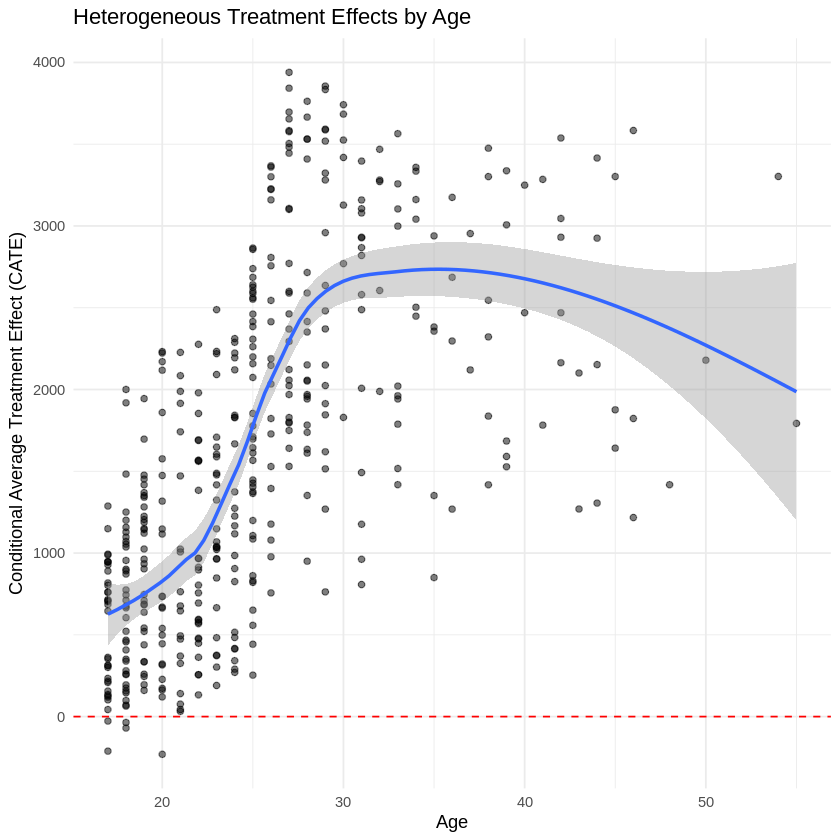

In [ ]:
# Test for heterogeneity
cf_heterogeneity <- test_calibration(cf)
cat("\nHeterogeneity test p-value:", cf_heterogeneity[2, 4], "\n")

# Variable importance
cf_importance <- variable_importance(cf)
importance_df <- data.frame(
  variable = colnames(X),
  importance = cf_importance
) %>% arrange(desc(importance))
cat("\nVariable Importance:\n")
print(importance_df)

# Best linear projection of CATE on covariates
# This helps understand which variables drive heterogeneity
blp <- best_linear_projection(cf, X)
cat("\nBest Linear Projection of CATE:\n")
print(summary(blp))

# Visualize heterogeneity by a key covariate (e.g., age)
library(ggplot2)
het_plot_data <- data.frame(
  age = X[, "age"],
  cate = cf_cate,
  cate_lower = cf_cate - 1.96 * cf_cate_se,
  cate_upper = cf_cate + 1.96 * cf_cate_se
)

p1 <- ggplot(het_plot_data, aes(x = age, y = cate)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", se = TRUE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Heterogeneous Treatment Effects by Age",
       x = "Age",
       y = "Conditional Average Treatment Effect (CATE)") +
  theme_minimal()
print(p1)

# Grouped average treatment effects
# Split by education level
edu_median <- median(X[, "education"])
low_edu <- X[, "education"] <= edu_median
high_edu <- X[, "education"] > edu_median

gate_low_edu <- average_treatment_effect(cf, subset = low_edu)
gate_high_edu <- average_treatment_effect(cf, subset = high_edu)

cat("\nGrouped Average Treatment Effects:\n")
cat("Low education ATE:", gate_low_edu[1], "(SE:", gate_low_edu[2], ")\n")
cat("High education ATE:", gate_high_edu[1], "(SE:", gate_high_edu[2], ")\n")

# Compare different methods



Comparison of All Methods:
S-Learner ATE: 1298.437 
T-Learner ATE: 1611.584 
X-Learner ATE: 1653.124 
DR-Learner ATE: 1603.394 
R-Learner ATE: 1257.946 
Causal Forest ATE: 1611.407 (SE: 671.9642 )


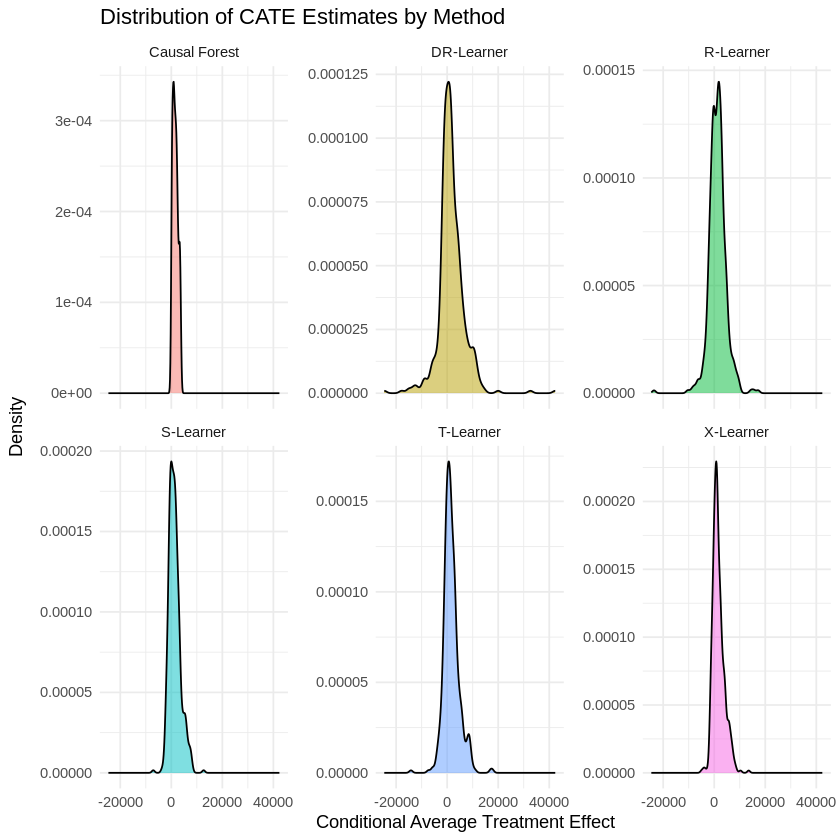

In [ ]:
# Compare all methods
cat("\n\nComparison of All Methods:\n")
cat("==================================\n")
cat("S-Learner ATE:", mean(s_results$cate), "\n")
cat("T-Learner ATE:", mean(t_results$cate), "\n")
cat("X-Learner ATE:", mean(x_results$cate), "\n")
cat("DR-Learner ATE:", mean(dr_results$cate), "\n")
cat("R-Learner ATE:", mean(r_results$cate), "\n")
cat("Causal Forest ATE:", cf_ate[1], "(SE:", cf_ate[2], ")\n")

# Create comparison plot
comparison_df <- data.frame(
  individual = rep(1:length(Y), 6),
  method = rep(c("S-Learner", "T-Learner", "X-Learner",
                 "DR-Learner", "R-Learner", "Causal Forest"), each = length(Y)),
  cate = c(s_results$cate, t_results$cate, x_results$cate,
           dr_results$cate, r_results$cate, cf_cate)
)

cat("==================================\n")
p2 <- ggplot(comparison_df, aes(x = cate, fill = method)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~method, scales = "free_y") +
  labs(title = "Distribution of CATE Estimates by Method",
       x = "Conditional Average Treatment Effect",
       y = "Density") +
  theme_minimal() +
  theme(legend.position = "none")
print(p2)


# Visualizations

box.palette (not diverging): #FF0000 (red) to #0000FF (blue)
cex 0.538   xlim c(0, 1)   ylim c(-0.3, 1.3)


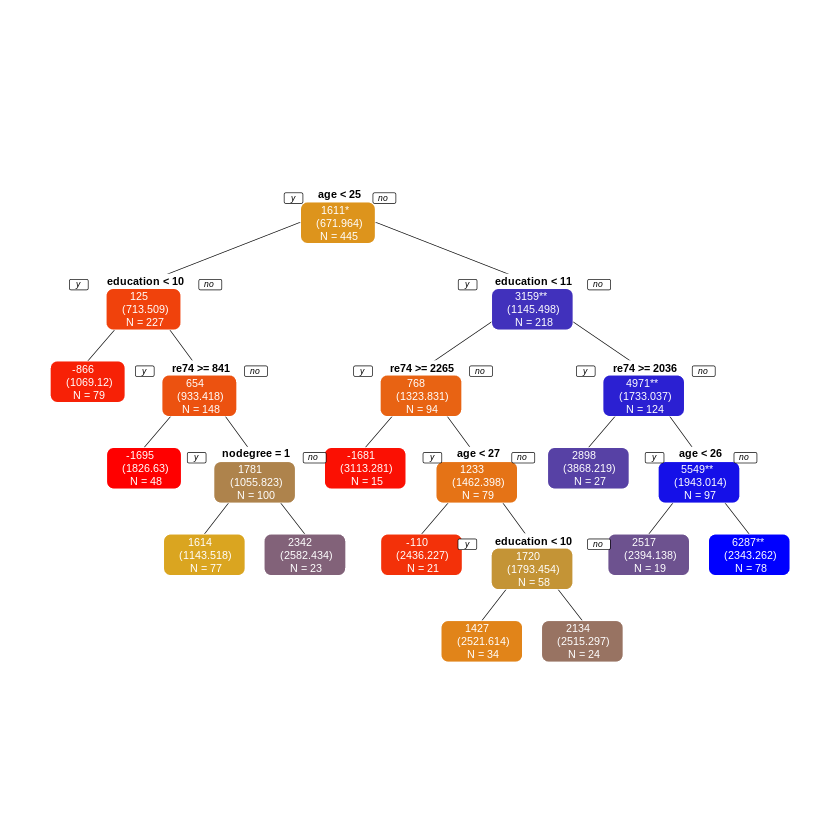

In [ ]:
# More visualizations are available in htetree package
lalonde$ate = cf$predictions
tree = rpart(as.formula(paste0("ate ~ ", paste(colnames(X),collapse="+"))),
    lalonde)

# get splitting rules to calculate CATEs
prty = as.party(tree)
opfit_tree = as.Node(prty)
x_num <- 0
hte_effect = list()
opfit_tree$Do(function(node){
    cate = average_treatment_effect(cf,
        subset = (1:nrow(lalonde))%in%as.numeric(rownames(node$data)) )
    x_num <<- x_num + 1
    hte_effect[[x_num]] <<- cate
})

hte_effect = bind_rows(hte_effect)
hte_effect$pvalue = 2*pnorm(-abs(hte_effect$estimate/hte_effect$std.err))
hte_effect$stars                         = "   "
hte_effect$stars[hte_effect$pvalue<.05]  = "*  "
hte_effect$stars[hte_effect$pvalue<.01]  = "** "
hte_effect$stars[hte_effect$pvalue<.001] = "***"

tree$frame$yval = hte_effect$estimate


rbPal = colorRampPalette(c("red","golden rod","blue"))
od = 1:length(tree$frame$yval)
cols = rbPal(length(tree$frame$yval))[od]

prp(tree,type = 1,nn=FALSE,box.palette = cols,
    suffix = paste0(hte_effect$stars, # significance
                    '\n (',round(hte_effect$std.err,3),')',  # se
                    '\n N = ',tree$frame$n),
    yesno = 2, yes.text = "y", no.text = "no",
    trace = TRUE, varlen = 0,
    col = "white")

# Common procedure for causal inference with observational data

Source: Tutorial for "LaLonde (1986) after Nearly Four Decades: Lessons Learned", Yiqing Xu


## Load and prepare data

In [ ]:
# Load data
load("/content/lalonde.RData")
load("/content/trimmed.RData")
treat <- "treat"
nsw_co$treat <- 1

# drop re74, u74, tau from cps1 and psid1
cps1a <- subset(cps1, select =  -c(re74, u74))
nsw_cps <- rbind.data.frame(nsw_tr, cps1a)

psid1a <- subset(psid1, select =  -c(re74, u74))
nsw_psid <- rbind.data.frame(nsw_tr, psid1a)


nsw_cps.plus <- rbind.data.frame(nsw_cps, nsw_co)
nsw_psid.plus <- rbind.data.frame(nsw_psid, nsw_co)

In [ ]:
# define variables
Y <- "re78"
treat <- "treat"
covar <- c("age", "education", "black", "hispanic", "married", "nodegree", "re75", "u75")

## Assessing overlapping

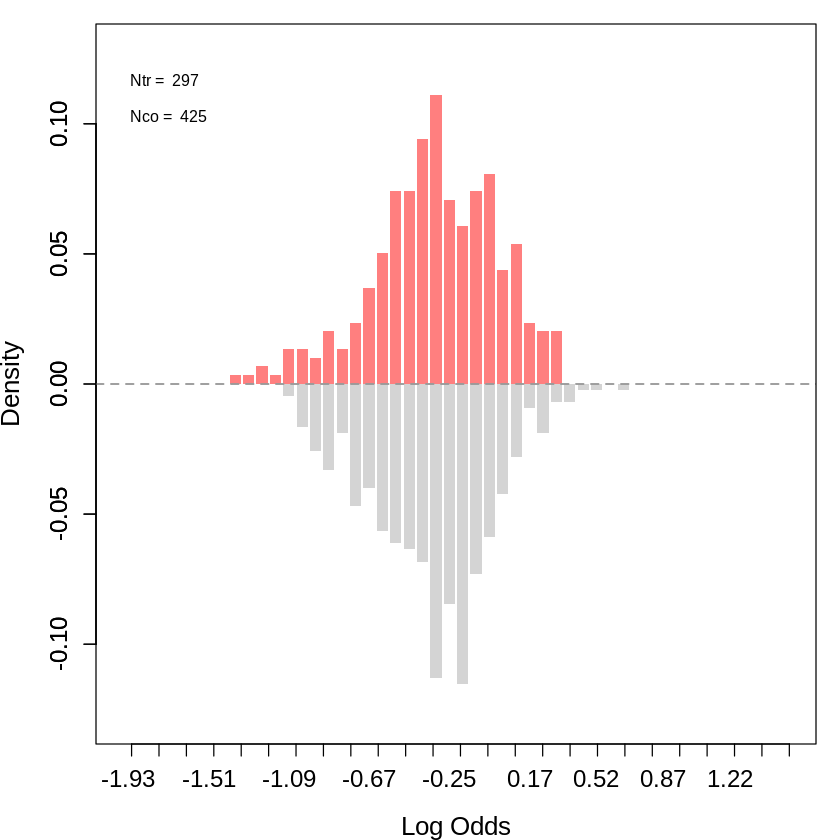

In [ ]:
# Assessing "common support" / overlapping
# LDW-Experimental data
nsw_ps <- assess_overlap(data = nsw, treat = treat, cov = covar, xlim = c(-2, 1.5))

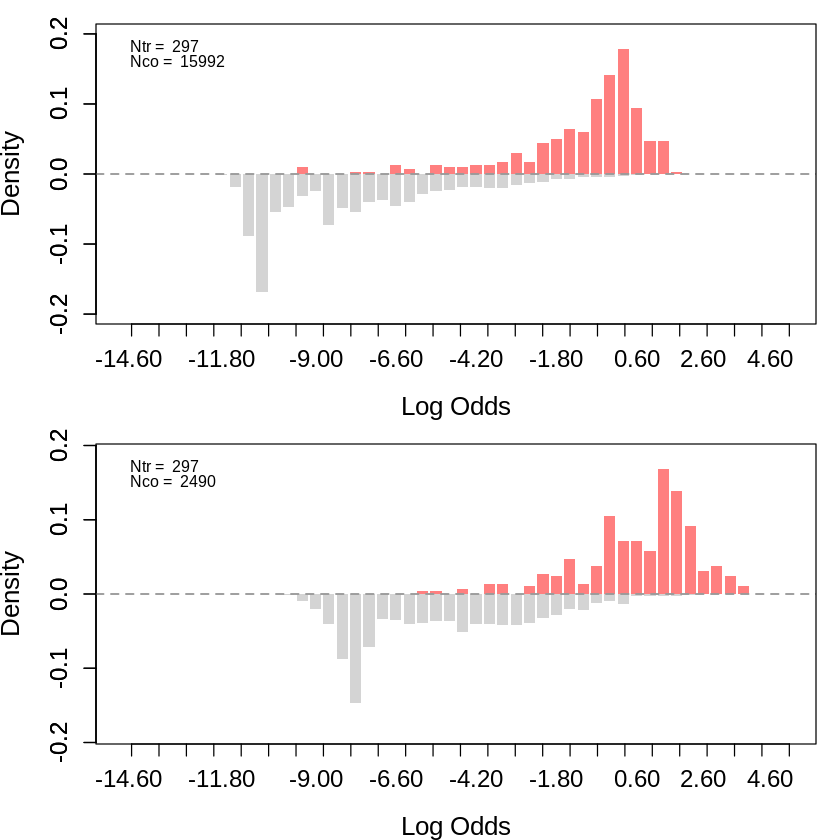

In [ ]:
# Comparing common support in different datasets
par(mfrow = c(2,1))
# NSW-CPS1
nsw_cps_ps <- assess_overlap(data = nsw_cps, treat = treat, cov = covar, xlim = c(-15, 5))
# NSW-PSID1
nsw_psid_ps <- assess_overlap(data = nsw_psid, treat = treat, cov = covar, xlim = c(-15, 5))

## Trimming to improve overlapping

Removing units with poor overlap based on the propensity score. This step aims to refine the datasets to improve later causal inference.

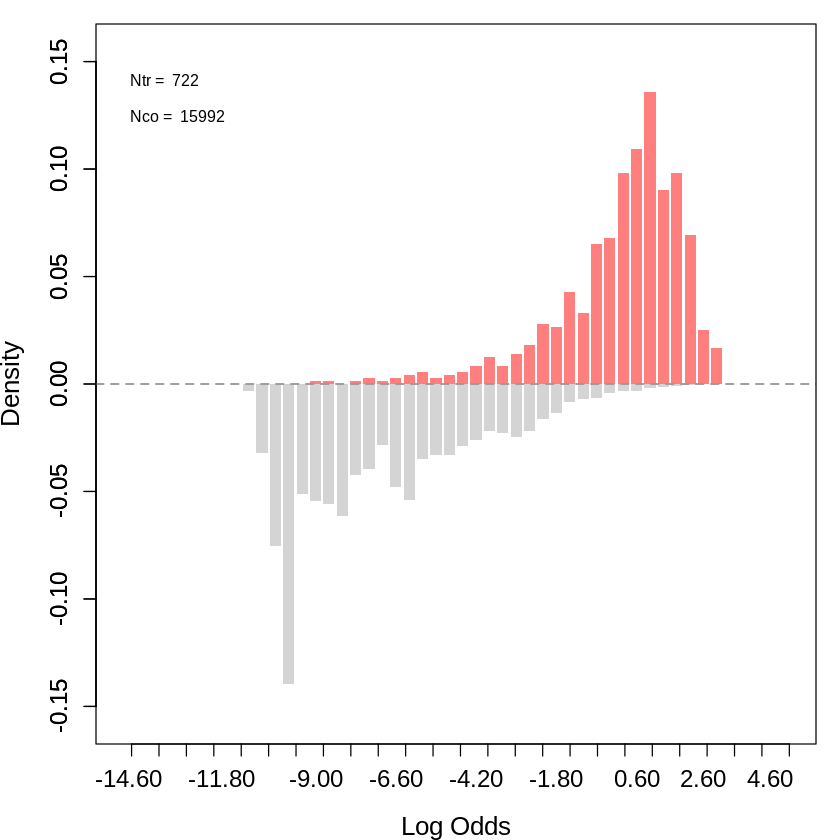

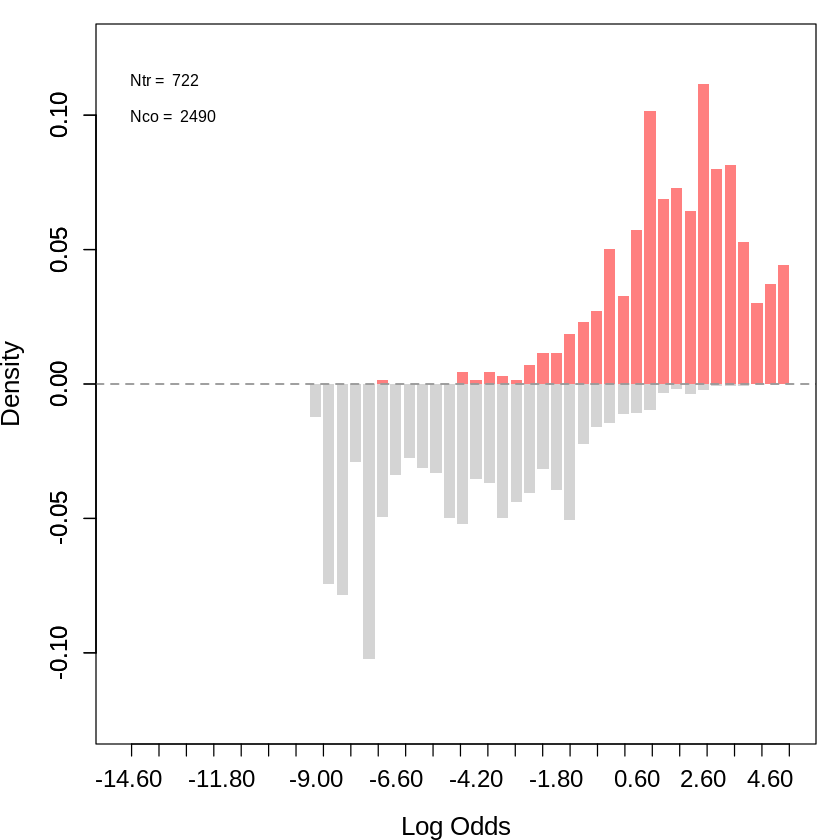

In [ ]:
nsw_cps.plus_ps <- assess_overlap(data = nsw_cps.plus, treat = treat, cov = covar, xlim = c(-15, 5))
nsw_psid.plus_ps <- assess_overlap(data = nsw_psid.plus, treat = treat, cov = covar, xlim = c(-15, 5))

In [ ]:
trim <- function(data, ps = "ps_assoverlap", threshold = 0.9) {
  sub <- data[which(data[, ps] < threshold), ]
  return(sub)
}

#Trim
nsw_cps_trim <- trim(nsw_cps.plus_ps, threshold = 0.85)
nsw_psid_trim <- trim(nsw_psid.plus_ps, threshold = 0.85)

# cps data
# excluding the experimental controls
nsw_cps_trim_match <- subset(nsw_cps_trim, sample %in% c(0,3) & ps_assoverlap)
# re-estimate propensity scores and employ 1:1 matching
nsw_cps_trim_match <- psmatch(data = nsw_cps_trim_match, Y = "re78", treat = "treat", cov = covar)

# psid data
# excluding the experimental controls
nsw_psid_trim_match <- subset(nsw_psid_trim, sample %in% c(0,4) & ps_assoverlap)
# re-estimate propensity scores and employ 1:1 matching
nsw_psid_trim_match <- psmatch(data = nsw_psid_trim_match, Y = "re78", treat = "treat", cov = covar)

In [ ]:
#cps
nsw_trim_cps <- subset(nsw_cps_trim, sample %in% c(0,0.5))
nsw_trim_cps$treat[which(nsw_trim_cps$sample == 0.5)] <- 0
#psid
nsw_trim_psid <- subset(nsw_psid_trim, sample %in% c(0,0.5))
nsw_trim_psid$treat[which(nsw_trim_psid$sample == 0.5)] <- 0

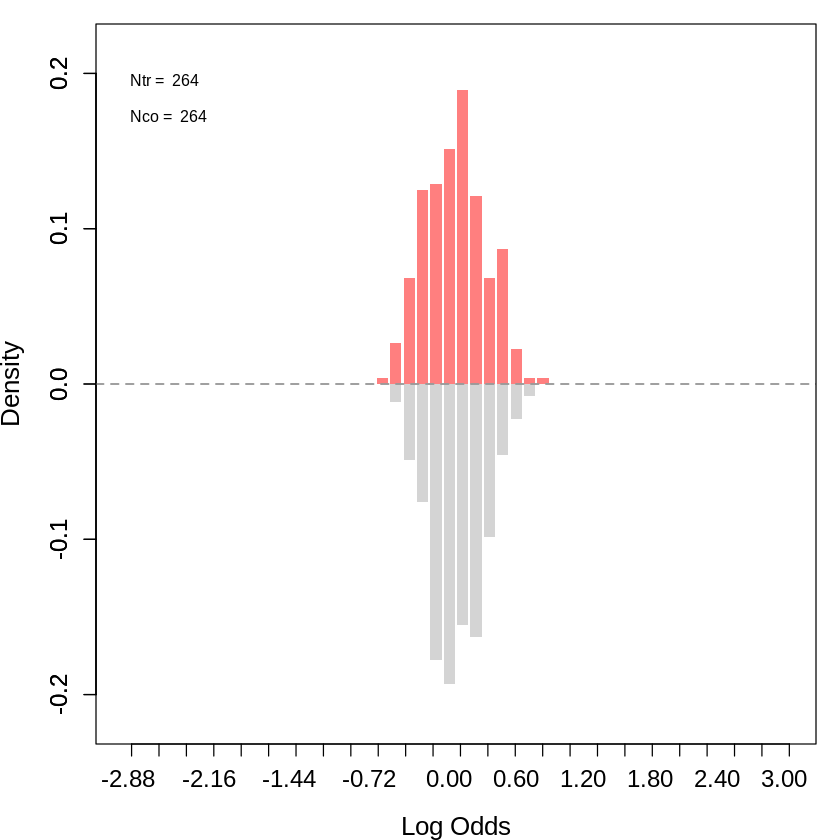

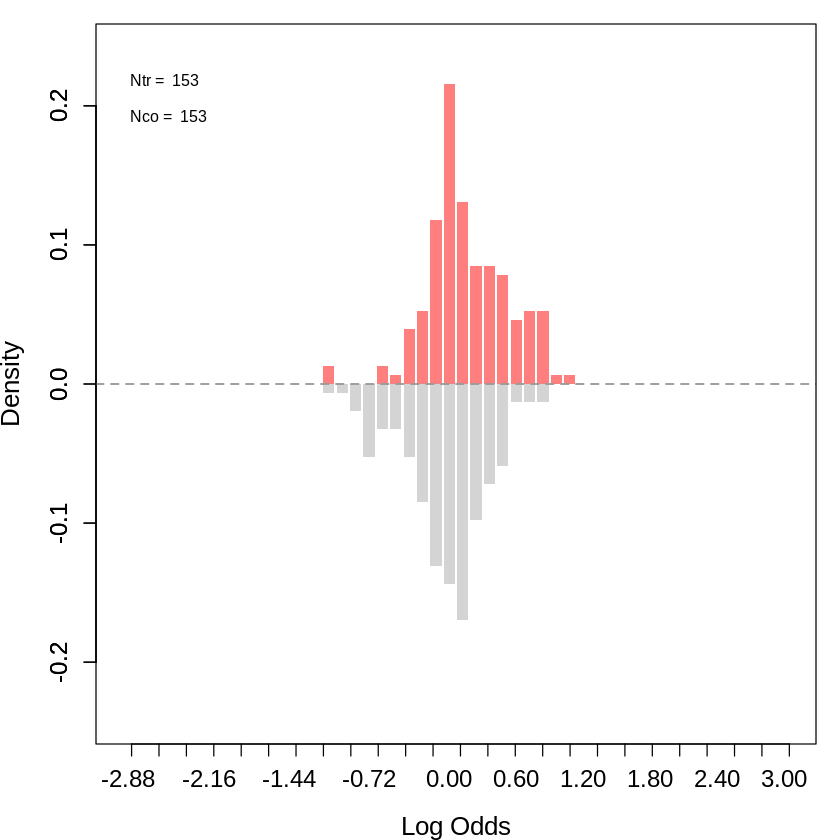

In [ ]:
# reassessing overlap

# cps data
nsw_cps_trim_match_ps <- assess_overlap(data = nsw_cps_trim_match, treat = treat, cov = covar, xlim = c(-3,3))

# psid data
nsw_psid_trim_match_ps <- assess_overlap(data = nsw_psid_trim_match, treat = treat, cov = covar, xlim = c(-3,3))

## Checking covariate balance

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


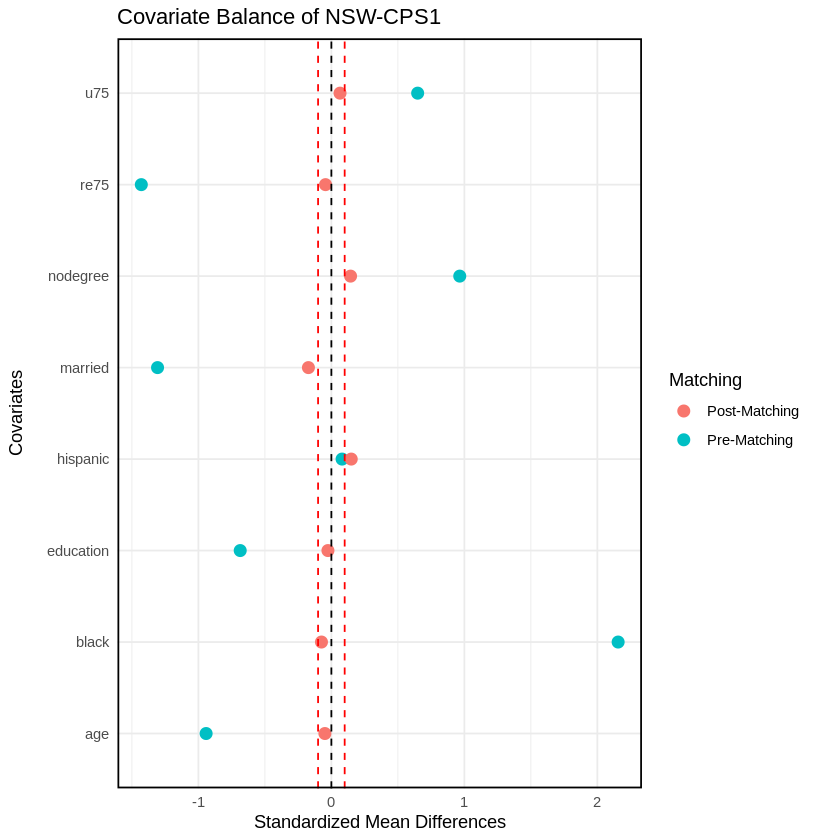

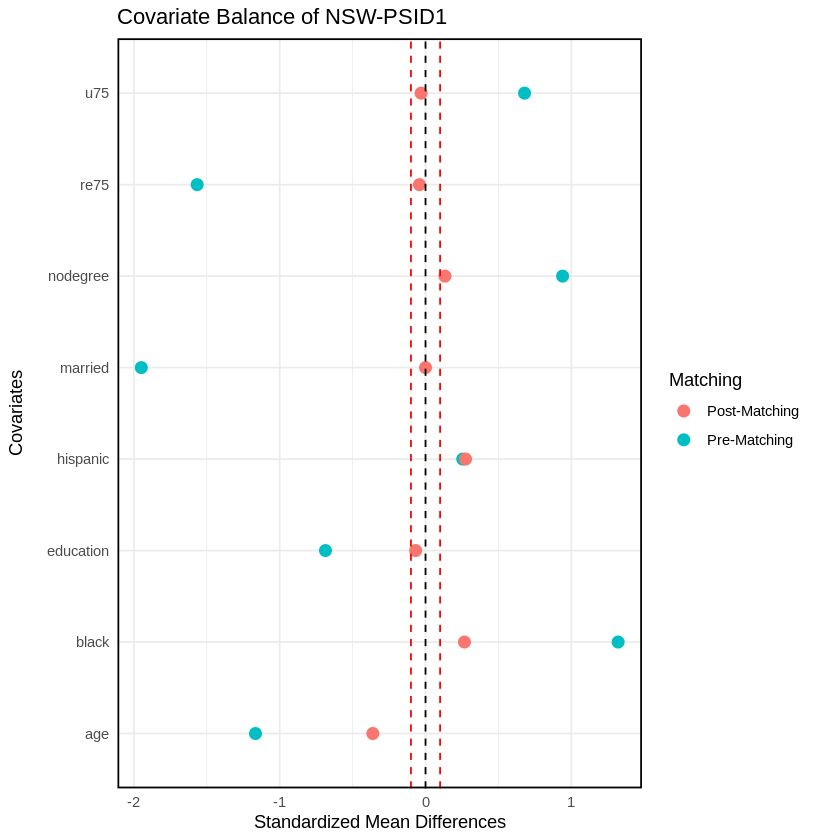

In [ ]:

# cps data
love.plot(nsw_cps, nsw_cps_trim_match, treat = treat, covar = covar, title = "Covariate Balance of NSW-CPS1")

# psid data
love.plot(nsw_psid, nsw_psid_trim_match, treat = treat, covar = covar, title = "Covariate Balance of NSW-PSID1")

## Estimate treatment effects

In [ ]:
# experimental
out1 <- estimate_all(nsw, "re78", "treat", covar)
out2 <- estimate_all(nsw_trim_cps, "re78", "treat", covar)
out3 <- estimate_all(nsw_trim_psid, "re78", "treat", covar)
# nonexperimental
out4 <- estimate_all(nsw_cps, "re78", "treat", covar)
out5 <- estimate_all(nsw_psid, "re78", "treat", covar)
out6 <- estimate_all(nsw_cps_trim_match, "re78", "treat", covar)
out7 <- estimate_all(nsw_psid_trim_match, "re78", "treat", covar)

Warning message in average_treatment_effect(c.forest, target.sample = "treated", :
“Estimated treatment propensities take values between 0.004 and 0.974 and in particular get very close to 0 and 1. In this case, using `target.sample=overlap`, or filtering data as in Crump, Hotz, Imbens, and Mitnik (Biometrika, 2009) may be helpful.”


In [ ]:
# print the result
a <- list(out4, out5, out6, out7)
n <- nrow(out1)
sav <- matrix("", n+1, length(a)*3-1)
for (j in 1:length(a)) {
    out <- a[[j]]
    n <- nrow(out)
    for (i in 2:(nrow(out)+1)) {
        sav[i, j*3-2] <- sprintf("%.2f", out[i-1, 1])
        sav[i, j*3-1] <- paste0("(", sprintf("%.2f", out[i-1, 2]), ")")
    }
}
sav[1, 1] <- sprintf("%.2f", out1[1, 1])
sav[1, 2] <- paste0("(", sprintf("%.2f", out1[1, 2]), ")")
sav[1, 4] <- sprintf("%.2f", out1[1, 1])
sav[1, 5] <- paste0("(", sprintf("%.2f", out1[1, 2]), ")")
sav[1, 7] <- sprintf("%.2f", out2[1, 1])
sav[1, 8] <- paste0("(", sprintf("%.2f", out2[1, 2]), ")")
sav[1, 10] <- sprintf("%.2f", out3[1, 1])
sav[1, 11] <- paste0("(", sprintf("%.2f", out3[1, 2]), ")")
colnames(sav) <- c("NSW-CPS1", "", "", "NSW-PSID1", "", "", "NSW-CPS1 (PS Trimmed) ", "", "", "NSW-PSID1 (PS Trimmed)", "")
rownames(sav) <- c("Experimental Benchmark", "Difference-in-Means", "Regression", " Oaxaca Blinder", "GRF", "NN Matching", "PS Matching", "IPW", "CBPS", "Entropy Balancing", "DML-ElasticNet", "AIPW-GRF")
sav %>% knitr::kable(booktabs=TRUE, caption = " Table B4 in the Supplementary Materials (SM), ATT Estimates: LaLonde Male Sample")



Table:  Table B4 in the Supplementary Materials (SM), ATT Estimates: LaLonde Male Sample

|                       |NSW-CPS1 |         |   |NSW-PSID1 |          |   |NSW-CPS1 (PS Trimmed)  |         |   |NSW-PSID1 (PS Trimmed) |          |
|:----------------------|:--------|:--------|:--|:---------|:---------|:--|:----------------------|:--------|:--|:----------------------|:---------|
|Experimental Benchmark |886.30   |(488.14) |   |886.30    |(488.14)  |   |771.48                 |(488.82) |   |690.22                 |(678.86)  |
|Difference-in-Means    |-8870.31 |(408.30) |   |-15577.57 |(508.12)  |   |-519.65                |(578.61) |   |-3569.56               |(1138.75) |
|Regression             |-792.15  |(479.67) |   |-1581.11  |(718.80)  |   |-336.84                |(552.46) |   |-3579.07               |(1270.85) |
|Oaxaca Blinder         |-726.42  |(462.50) |   |-1215.01  |(481.08)  |   |-323.38                |(461.86) |   |-3476.55               |(644.84)  |
|GRF          

## Conditional Average Treatment Effect on the Treated (CATT)

In [ ]:
# estimate catt
catt.nsw <- catt(nsw, Y, treat, covar)
catt.cps <- catt(nsw_cps, Y, treat, covar)
catt.psid <- catt(nsw_psid, Y, treat, covar)
catt.cps.trim <- catt(nsw_cps_trim_match, Y, treat, covar)
catt.psid.trim <- catt(nsw_psid_trim_match, Y, treat, covar)
# trimmed experimental data
catt.nsw.cps <- catt(nsw_trim_cps, Y, treat, covar)
catt.nsw.psid <- catt(nsw_trim_psid, Y, treat, covar)

Warning message in average_treatment_effect(tau.forest, target.sample = "treated", :
“Estimated treatment propensities take values between 0.004 and 0.972 and in particular get very close to 0 and 1. In this case, using `target.sample=overlap`, or filtering data as in Crump, Hotz, Imbens, and Mitnik (Biometrika, 2009) may be helpful.”


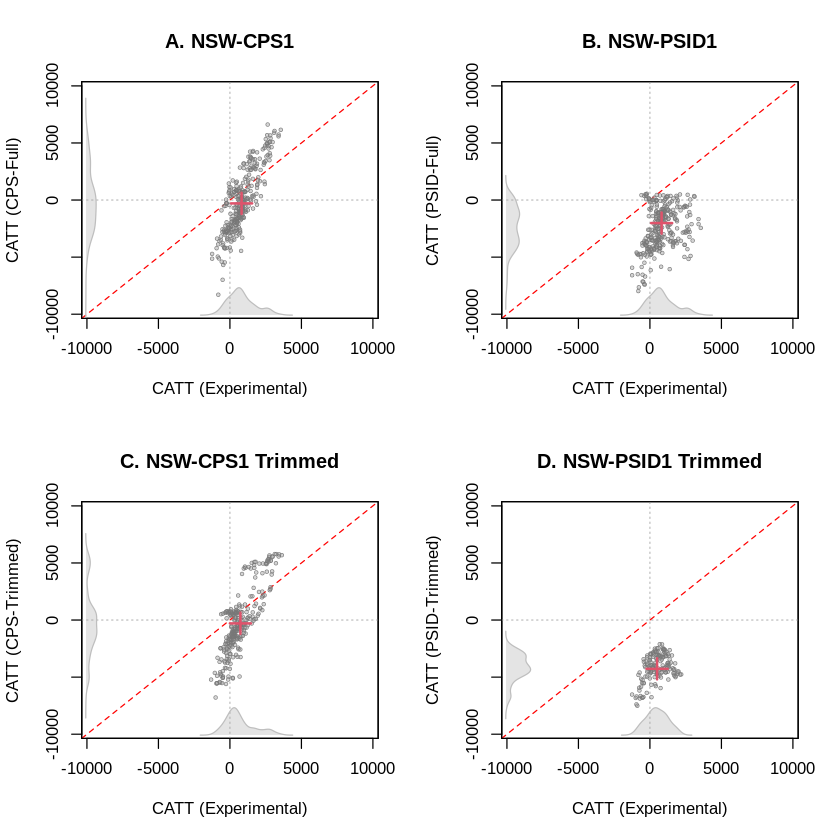

In [ ]:
par(mfrow = c(2,2))
# plot catt - "CATT (Experimental)" and "CATT (CPS-Full)"
catt1 <- catt.nsw$catt
att1 <- catt.nsw$att[1]
catt2 <- catt.cps$catt
att2 <- catt.cps$att[1]
plot_catt(catt1, catt2, att1, att2, "CATT (Experimental)", "CATT (CPS-Full)",
          main = "A. NSW-CPS1", c(-8000, 8000))

# plot catt - "CATT (Experimental)" and "CATT (PSID-Full)"
catt1 <- catt.nsw$catt
att1 <- catt.nsw$att[1]
catt2 <- catt.psid$catt
att2 <- catt.psid$att[1]
plot_catt(catt1, catt2, att1, att2, "CATT (Experimental)", "CATT (PSID-Full)",
    main = "B. NSW-PSID1", c(-8000, 8000))

# plot catt - "CATT (Experimental)" and "CATT (CPS-Trimmed)"
catt1 <- catt.nsw.cps$catt
att1 <- catt.nsw.cps$att[1]
catt2 <- catt.cps.trim$catt
att2 <- catt.cps.trim$att[1]
plot_catt(catt1, catt2, att1, att2, "CATT (Experimental)", "CATT (CPS-Trimmed)",
    main = "C. NSW-CPS1 Trimmed", c(-8000, 8000))

# plot catt - "CATT (Experimental)" and "CATT (PSID-Trimmed)"
catt1 <- catt.nsw.psid$catt
att1 <- catt.nsw.psid$att[1]
catt2 <- catt.psid.trim$catt
att2 <- catt.psid.trim$att[1]
plot_catt(catt1, catt2, att1, att2, "CATT (Experimental)", "CATT (PSID-Trimmed)",
    main = "D. NSW-PSID1 Trimmed", c(-8000, 8000))

## Quantile Treatment Effect on the Treated (QTET)

In [ ]:
# estimate qte (some of the following lines are not run due to computational limitation)
qte.nsw <- est_qte(Y, treat, NULL, data = nsw)
qte.nsw.cps <- est_qte(Y, treat, NULL, data = nsw_trim_cps)
qte.nsw.psid <- est_qte(Y, treat, NULL, data = nsw_trim_psid)
#qte.nsw_cps <- est_qte(Y, treat, covar, data = nsw_cps) # adjusted
#qte.nsw_cps0 <- est_qte(Y, treat, NULL, data = nsw_cps) # unadjusted
qte.nsw_cps.trim <- est_qte(Y, treat, covar, data = nsw_cps_trim_match) # adjusted
qte.nsw_cps.trim0 <- est_qte(Y, treat, NULL, data = nsw_cps_trim_match) # unadjusted
#qte.nsw_psid <- est_qte(Y, treat, covar, data = nsw_psid) # adjusted
#qte.nsw_psid0 <- est_qte(Y, treat, NULL, data = nsw_psid) # unadjusted
qte.nsw_psid.trim <- est_qte(Y, treat, covar, data = nsw_psid_trim_match) # adjusted
qte.nsw_psid.trim0 <- est_qte(Y, treat, NULL, data = nsw_psid_trim_match) # unadjusted

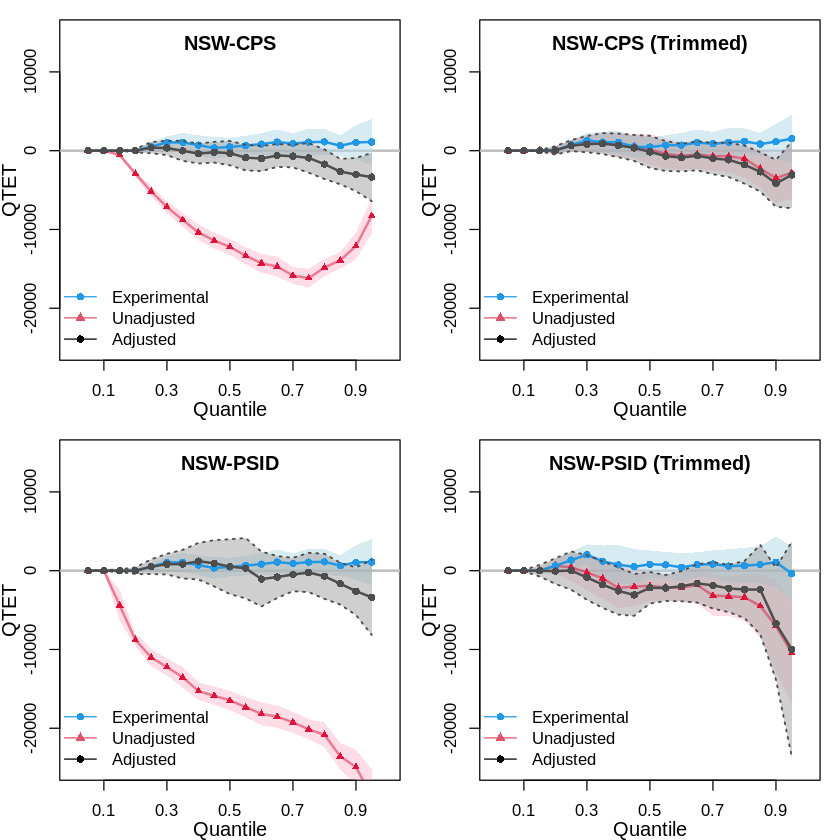

In [ ]:
# plot qte

#load the data
load("/content/qte_nsw.rds")

par(mfrow = c(2,2))
# CPS
plot_qte(qte.nsw_cps, qte.nsw_cps0, qte.nsw, main = "NSW-CPS", ylim = c(-25000, 15000))
legend("bottomleft", legend = c("Experimental", "Unadjusted", "Adjusted"), lty = 1, pch = c(16, 17, 16), col = c(4, 2, 1), bty = "n")

## CPS trimmed
plot_qte(qte.nsw_cps.trim, qte.nsw_cps.trim0, qte.nsw.cps, main = "NSW-CPS (Trimmed)", ylim = c(-25000, 15000))
legend("bottomleft", legend = c("Experimental", "Unadjusted", "Adjusted"),
    lty = 1, pch = c(16, 17, 16), col = c(4, 2, 1), bty = "n")

# PSID
plot_qte(qte.nsw_psid, qte.nsw_psid0, qte.nsw, main = "NSW-PSID", ylim = c(-25000, 15000))
legend("bottomleft", legend = c("Experimental", "Unadjusted", "Adjusted"),
    lty = 1, pch = c(16, 17, 16), col = c(4, 2, 1), bty = "n")

# PSID trimmed
plot_qte(qte.nsw_psid.trim, qte.nsw_psid.trim0, qte.nsw.psid, main = "NSW-PSID (Trimmed)", ylim = c(-25000, 15000))
legend("bottomleft", legend = c("Experimental", "Unadjusted", "Adjusted"),
    lty = 1, pch = c(16, 17, 16), col = c(4, 2, 1), bty = "n")

## Sensitivity Analysis

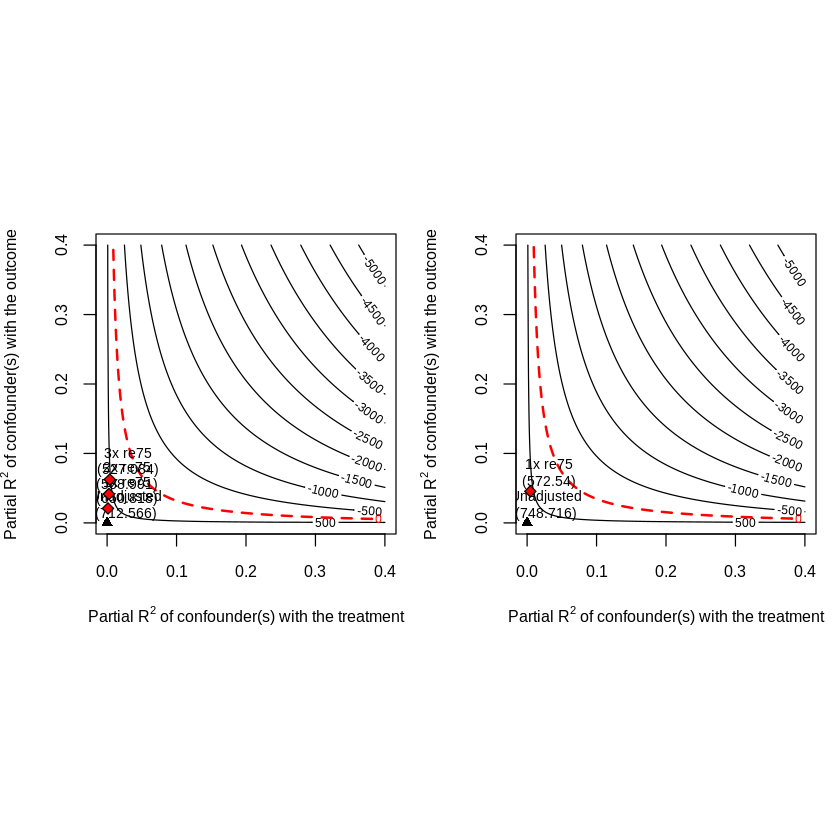

In [ ]:
par(mfrow = c(1,2))

## datasets to be used: nsw, nsw_trim_cps, nsw_trim_psid
Y <- "re78"
treat <- "treat"
covar <- c("age", "education", "black", "hispanic", "married", "nodegree", "re75", "u75")
bm <- c("re75")

# trimmed NSW-CPS data
sens_ana(nsw_trim_cps, Y, treat, covar, bm, kd = 1:3)

# trimmed NSW-PSID data
sens_ana(nsw_trim_psid, Y, treat, covar, bm, kd = 1)